In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random

In [4]:
data = pd.read_csv(r"C:\Users\ASUS\Downloads\MNIST-20221031T095906Z-001\MNIST\mnist_784_csv.csv")

In [5]:
print(data)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

In [19]:
X = data.drop(columns=['class']).values
Y = data['class'].values

In [20]:
X.shape

(70000, 784)

In [21]:
Y.shape

(70000,)

In [22]:
Y = to_categorical(Y, num_classes=10)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [34]:
x_train.shape

(56000, 784)

In [35]:
y_train.shape

(56000, 10)

In [57]:
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax'),
])

C:\Users\ASUS\Anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [59]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1, verbose=1)

Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7875 - loss: 2.4288 - val_accuracy: 0.8657 - val_loss: 0.5703
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9050 - loss: 0.3764 - val_accuracy: 0.9075 - val_loss: 0.3541
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9338 - loss: 0.2447 - val_accuracy: 0.9329 - val_loss: 0.2690
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9486 - loss: 0.1825 - val_accuracy: 0.9357 - val_loss: 0.2474
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9561 - loss: 0.1511 - val_accuracy: 0.9486 - val_loss: 0.2227
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9620 - loss: 0.1293 - val_accuracy: 0.9396 - val_loss: 0.2378
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9666 - loss: 0.1112 - val_accuracy: 0.9448 - val_loss: 0.2261
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9698 - loss: 0.0999 - val_accuracy: 0.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

In [ ]:
test_acc*100

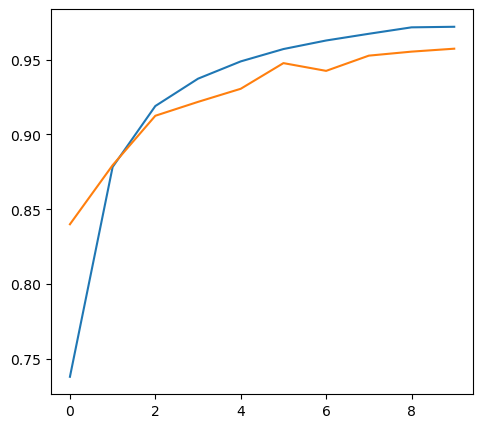

In [53]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

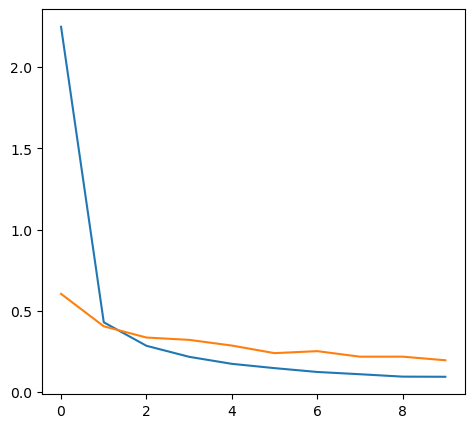

In [54]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [63]:
#predictions
predictions = model.predict(x_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Text(0.5, 1.0, 'predicted class: 8')

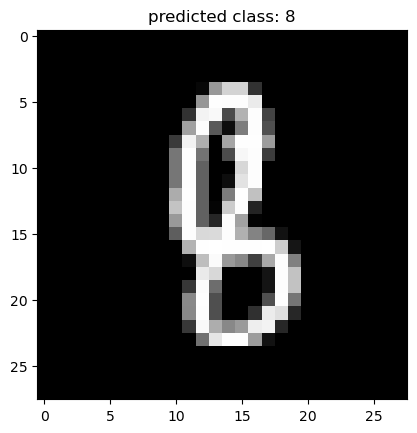

In [62]:
idx = 9999
plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
plt.title(f"predicted class: {np.argmax(predictions[idx])}")